In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
path_hash = "/Users/januaryshen/Dropbox/S19 - CSE 547/hw4/q4/data/hash_params.txt"
path_word = "/Users/januaryshen/Dropbox/S19 - CSE 547/hw4/q4/data/words_stream.txt"
path_word_freq = "/Users/januaryshen/Dropbox/S19 - CSE 547/hw4/q4/data/counts.txt"

hash_f = np.matrix(np.loadtxt(path_hash, delimiter = '\t'))
x = np.loadtxt(path_word)
word_freq = np.loadtxt(path_word_freq)

In [3]:
def hash_fun_to_dict(a, b, p, n_buckets, x, dict_h):
    for i in range(len(x)):
        y = x[i] % p
        hash_val = (a*y + b) % p
        pos = hash_val % n_buckets
        dict_h[pos] = dict_h.get(pos, 0) + 1
    return dict_h

def hash_fun(a, b, p, n_buckets, x):
    y = x % p
    hash_val = (a*y + b) % p
    return hash_val % n_buckets

def get_hash(target, hash_f):
    return hash_f[target, 0], hash_f[target, 1]

def get_F(path_word_freq, target):
    with open(path_word_freq) as f:
        for line in f:
            word = line.split()
            if int(word[0]) == target:
                return int(word[1])
        
def get_Ftelda(buckets, target):
    min_count = pow(10,5)  # assign a super big number
    for i in range(hash_f.shape[0]):
        a, b = (hash_f[i, 0], hash_f[i, 1])
        pos = hash_fun(a, b, p, n_buckets, target)
        if min_count > buckets[i][pos]:
            min_count = buckets[i][pos]
    return min_count

def rel_error(Ftelda, F):
    return (Ftelda-F)/F

In [4]:
p = 123457
epsilon = math.e * pow(10, -4)
delta = pow(math.e, -5)
n_buckets = math.ceil(math.e/epsilon)
t = len(x)

hsd1 = dict()
hsd2 = dict()
hsd3 = dict()
hsd4 = dict()
hsd5 = dict()

buckets = [hsd1, hsd2, hsd3, hsd4, hsd5]

for i in range(hash_f.shape[0]):
    a, b = get_hash(i, hash_f)
    hash_fun_to_dict(a, b, p, n_buckets, x, buckets[i])
    
# cheating
actual_d = dict()
for j in range(t):
    actual_d[x[j]] = actual_d.get(x[j], 0) + 1
    

In [5]:
start = time.time()

# relError = [(get_F(path_word_freq, 1)/t, rel_error(get_Ftelda(buckets, 1), get_F(path_word_freq, 1)))]
# for i in range(2, t):
#     relError.append((get_F(path_word_freq, i)/t, rel_error(get_Ftelda(buckets, i), get_F(path_word_freq, i))))

# cheating
relError = [(actual_d[1]/t, rel_error(get_Ftelda(buckets, 1), actual_d[1]))]
for i in range(2, len(actual_d)):
    relError.append((actual_d[i]/t, rel_error(get_Ftelda(buckets, i), actual_d[i])))

end = time.time()
print("total time: %.2f" % (end-start))

total time: 31.20


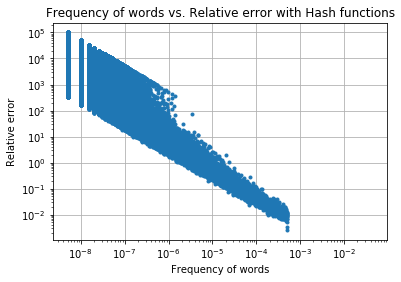

In [6]:
plt.plot(*zip(*relError), ".")
plt.xlabel("Frequency of words")
plt.xscale('log')
plt.ylabel("Relative error")
plt.yscale('log')
plt.title("Frequency of words vs. Relative error with Hash functions")
plt.grid()
plt.savefig("HW4P3.png")
plt.show()